In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

Text(0, 0.5, 'PDF')

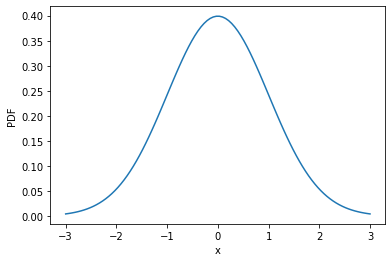

In [61]:
x = np.linspace(-3, 3, 100)
# on choisit 0 comme moyenne de la Gaussienne.
# (la Gaussienne est centrée sur 0)
# et 1 pour sa largeur, appelée sigma
plt.plot(x, norm.pdf(x, 0., 1.))
plt.xlabel("x")
plt.ylabel("PDF")

In [62]:
normal = np.random.normal
sigma = 1
x0 = normal(-1.5, sigma, 100)
x1 = normal(1.5, sigma, 100)
# étiquettes
y0 = np.zeros_like(x0)
y1 = np.ones_like(x1)

Text(0, 0.5, 'category')

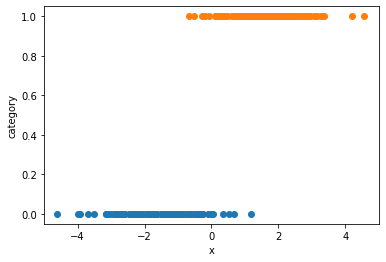

In [63]:
plt.xlim(-5, 5)
plt.plot(x0, y0, "o")
plt.plot(x1, y1, "o")
plt.xlabel("x")
plt.ylabel("category")

Text(0, 0.5, 'counts')

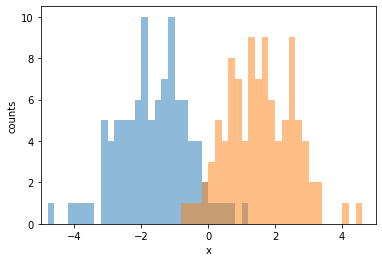

In [64]:
plt.clf()
plt.xlim(-5, 5)
plt.hist(x0, bins=50, range=(-5, 5), alpha=0.5)
plt.hist(x1, bins=50, range=(-5, 5), alpha=0.5)
plt.xlabel("x")
plt.ylabel("counts")

Text(0, 0.5, '$\\sigma(z)$')

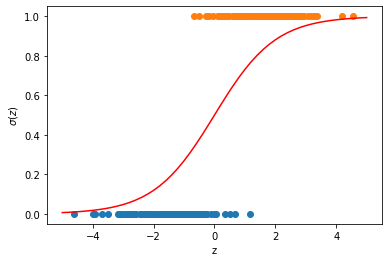

In [65]:
# définition des paramètres
b = 0
w = 1

def sigmoid(x1):
    # z est une fonction linéaire de x1
    z = w * x1 + b
    return 1 / (1 + np.exp(-z))

# tableau contenant des valeurs de x espacées
# régulièrement entre -5 et 5
linx = np.linspace(-5, 5, 51)
plt.plot(x0, np.zeros_like(x0), "o")
plt.plot(x1, np.ones_like(x1), "o")
plt.plot(linx, sigmoid(linx), color="red")
plt.xlabel("z")
plt.ylabel(f"$\sigma(z)$")

In [66]:
# création d'un tableau 1D contenant
# les exemples de x0 et x1
x = np.concatenate((x0, x1))
# x est un tableau 1D
# on le transforme en un tableau 2D avec une valeur par ligne.
# la première dimension indexe les exemples
# la deuxième contient la valeur pour chaque exemple.
x = np.c_[x]
# création d'un tableau 1D avec les étiquettes
# y0 et y1
y = np.concatenate((y0, y1))

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression(solver="lbfgs").fit(x, y)

In [69]:
clf.predict_proba([[4]])

array([[1.91080025e-05, 9.99980892e-01]])

In [70]:
linx = np.c_[np.linspace(-5, 5, 100)]

In [71]:
# predict_proba prend un tableau d'exemples, 
# c'est à dire un tableau 2D
prob = clf.predict_proba(linx)
prob.shape

(100, 2)

In [72]:
# extraction de la deuxième probabilité
# (pour la catégorie 1), pour chaque exemple
# nous obtenons un tableau 2D 
# et le transformons en tableau 1D de taille 100:
prob = prob[:, 1].reshape(len(linx))
prob.shape

(100,)

Text(0, 0.5, 'category probability')

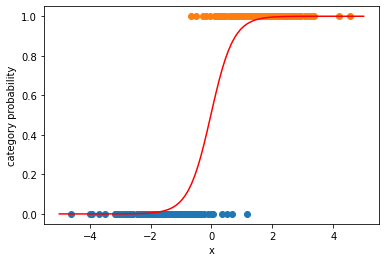

In [73]:
# both linx and prob must be 1D
plt.plot(linx, prob, color="red")
plt.scatter(x0, y0)
plt.scatter(x1, y1)
plt.xlabel("x")
plt.ylabel("category probability")

In [74]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(), solver="lbfgs")
mlp.fit(x, y)

MLPClassifier(hidden_layer_sizes=(), solver='lbfgs')

Text(0, 0.5, 'Category Probability')

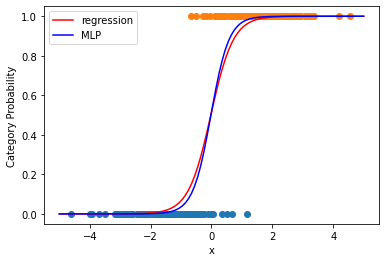

In [75]:
prob_mlp = mlp.predict_proba(linx)
# take the second probability 
# (to be in category 1) for each example
# and reshape it to a 1D array of size 100
prob_mlp = prob_mlp[:, 1].reshape(len(linx))
plt.plot(linx, prob, color="red", label="regression")
plt.plot(linx, prob_mlp, color="blue", label="MLP")
plt.scatter(x0, y0)
plt.scatter(x1, y1)
plt.legend()
plt.xlabel("x")
plt.ylabel("Category Probability")